In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np
import math
import absl
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
tf.set_random_seed(1)
np.random.seed(1)

In [3]:
# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.sinc(5*x) + noise                          # shape (100, 1) + some noise

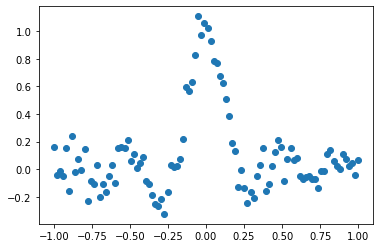

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
input_x = tf.placeholder(tf.float32, [None, 1])      # input x
#input_x = tf.placeholder(tf.float32, [100, 1])     
output_y = tf.placeholder(tf.float32, [None, 1])     # input y
#output_y = tf.placeholder(tf.float32, [100, 1])

In [6]:
# neural network layers
h1 = tf.layers.dense(inputs=input_x, units=10, activation=tf.nn.relu, name='h1')   # hidden layer
h2 = tf.layers.dense(inputs=h1, units=10, activation=tf.nn.relu, name='h2')        # hidden layer
output = tf.layers.dense(inputs=h2, units=1, name='output')       

/Users/gloria/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/gloria/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


In [7]:
loss = tf.losses.mean_squared_error(output_y, output)   # compute cost

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_op = optimizer.minimize(loss)

In [9]:
def get_weights_variable(layer_name):
    with tf.variable_scope(layer_name, reuse=True):
        variable = tf.get_variable('kernel')
    return variable

In [10]:
weights_h1 = get_weights_variable(layer_name='h1')
weights_h2 = get_weights_variable(layer_name='h2')
print(weights_h1)
print(weights_h2)

weights_out = get_weights_variable(layer_name='output')
print(weights_out)

<tf.Variable 'h1/kernel:0' shape=(1, 10) dtype=float32_ref>
<tf.Variable 'h2/kernel:0' shape=(10, 10) dtype=float32_ref>
<tf.Variable 'output/kernel:0' shape=(10, 1) dtype=float32_ref>


In [11]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [12]:
grads = tf.gradients(loss, weights_out)[0]
print(grads)

Tensor("gradients_1/output/MatMul_grad/MatMul_1:0", shape=(10, 1), dtype=float32)


In [13]:
hessian = tf.reduce_sum(tf.hessians(loss, weights_out)[0], axis = 2)
print(hessian)

Tensor("Sum:0", shape=(10, 1, 1), dtype=float32)


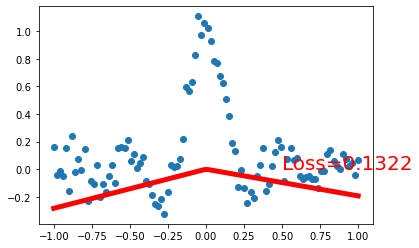

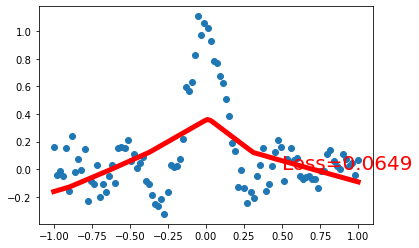

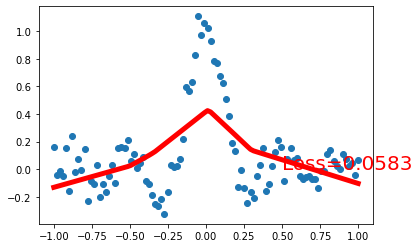

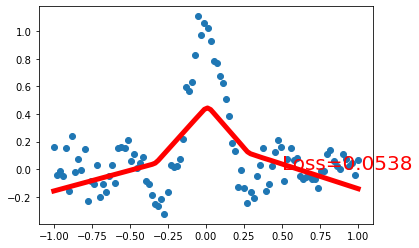

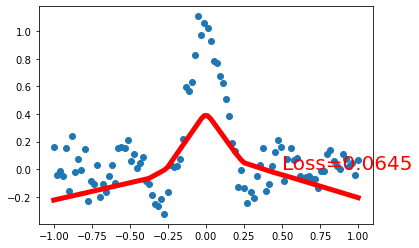

In [14]:
train_op = optimizer.minimize(loss)
loss = tf.losses.mean_squared_error(output_y, output)
grad_list=[]
for iteration in range(100):
    # train and net output
    _, l, pred = session.run([train_op, loss, output], feed_dict={input_x: x, output_y: y})
    grads_vals, hess_vals = session.run([grads, hessian], feed_dict={input_x: x, output_y: y})
    grad_list.append(grads_vals)
    if iteration % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x, y)
        plt.plot(x, pred, 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

In [15]:
print(np.array(grad_list)[:,1])

[[ 0.0000000e+00]
 [-7.8980060e-04]
 [-1.0695765e-03]
 [-4.8301509e-03]
 [-4.7677797e-03]
 [-9.3810521e-03]
 [-7.3561757e-03]
 [-1.2528453e-02]
 [-7.7160024e-03]
 [-1.4058841e-02]
 [-7.0987376e-03]
 [-1.4022825e-02]
 [-6.0905674e-03]
 [-1.4796937e-02]
 [-5.7100896e-03]
 [-1.4008171e-02]
 [-4.9671270e-03]
 [-1.3931324e-02]
 [-5.4148789e-03]
 [-1.3930539e-02]
 [-5.8548488e-03]
 [-1.3511472e-02]
 [-5.9597297e-03]
 [-1.4357337e-02]
 [-7.2026704e-03]
 [-1.4265257e-02]
 [-8.1384927e-03]
 [-1.3989154e-02]
 [-8.6637046e-03]
 [-1.3730988e-02]
 [-8.7621585e-03]
 [-1.3933657e-02]
 [-9.1672121e-03]
 [-1.3594082e-02]
 [-8.9389831e-03]
 [-1.4210852e-02]
 [-9.4519332e-03]
 [-1.3906778e-02]
 [-9.7884713e-03]
 [-1.4076617e-02]
 [-1.0410661e-02]
 [-1.4455598e-02]
 [-1.0436121e-02]
 [-1.5210116e-02]
 [-1.0600964e-02]
 [-1.5431061e-02]
 [-1.0328175e-02]
 [-1.6042177e-02]
 [-1.0618213e-02]
 [-1.6053556e-02]
 [-1.0719976e-02]
 [-1.6368756e-02]
 [-1.0473526e-02]
 [-1.6791299e-02]
 [-1.0394309e-02]
 [-1.68728

In [16]:
min(np.array(grad_list)[:,1])

array([-0.02529678], dtype=float32)